<a href="https://colab.research.google.com/github/MaLuisa7/BusinessIntelligence_Class_master/blob/main/Hierarquical_fcast_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [14]:
lowest_hierar = ['z1_c1_s1', 'z1_c2_s2', 'z1_c2_s3', 'z1_c3_s4', 'z1_c3_s5', 'z1_c4_s6', 'z1_c4_s7', 'z1_c5_s8', 'z1_c5_s9',
          'z2_c1_s1', 'z2_c2_s2', 'z2_c2_s3', 'z2_c3_s4', 'z2_c3_s5', 'z2_c4_s6', 'z2_c4_s7', 'z2_c5_s8', 'z2_c5_s9',
          'z3_c1_s1', 'z3_c2_s2', 'z3_c2_s3', 'z3_c3_s4', 'z3_c3_s5', 'z3_c4_s6', 'z3_c4_s7', 'z3_c5_s8', 'z3_c5_s9',
          'z4_c1_s1', 'z4_c2_s2', 'z4_c2_s3', 'z4_c3_s4', 'z4_c3_s5', 'z4_c4_s6', 'z4_c4_s7', 'z4_c5_s8', 'z4_c5_s9']
mid_hierar = ['z1_c1', 'z2_c1', 'z3_c1', 'z4_c1',
            'z1_c2', 'z2_c2', 'z3_c2', 'z4_c2',
            'z1_c3', 'z2_c3', 'z3_c3', 'z4_c3',
            'z1_c4', 'z2_c4', 'z3_c4', 'z4_c4',
            'z1_c5', 'z2_c5', 'z3_c5', 'z4_c5']
high_hierar = ['z1','z2','z3','z4']

In [3]:
# matriz_s = pd.read_csv("/content/matriz-jerar-zc.csv")
matriz_s = pd.read_excel('/content/matriz-jerarquica-s.xlsx')

matriz_s = matriz_s.iloc[:,1:]
matriz_s.replace(np.nan, 0, inplace=True)
s_colnames = list(matriz_s.columns)
s_colnames = [s.replace('-', '_') for s in s_colnames]
matriz_s.columns = ['nivel'] + s_colnames[1:]

nivel_lst_original = matriz_s.nivel.to_list()
nivel_lst_mod= [s.replace('-', '_') for s in nivel_lst_original]
# matriz_s['nivel'] = nivel_lst_mod
matriz_s.index =nivel_lst_mod
matriz_s.drop(columns = 'nivel', inplace=True)

matriz_s.head()

,z1_c1_s1,z1_c2_s2,z1_c2_s3,z1_c3_s4,z1_c3_s5,z1_c4_s6,z1_c4_s7,z1_c5_s8,z1_c5_s9,z2_c1_s1,...,z3_c5_s9,z4_c1_s1,z4_c2_s2,z4_c2_s3,z4_c3_s4,z4_c3_s5,z4_c4_s6,z4_c4_s7,z4_c5_s8,z4_c5_s9
b1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
z1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
z2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
z3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
z4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [4]:
columnas = ['company'] + list(matriz_s.index)[1:]
# columnas

In [5]:
path  = "/content/datapredicted_R_20231113_2.csv"
df_fcast = pd.read_csv(path)
idx = pd.date_range(start = '2023-01-01', end = '2023-12-30', freq='W')
df_fcast.index = idx
df_fcast = df_fcast.loc[:, columnas]
print(df_fcast.shape)
df_fcast.head(2)

(52, 61)


,company,z1,z2,z3,z4,z1_c1,z1_c2,z1_c3,z1_c4,z1_c5,...,z3_c5_s9,z4_c1_s1,z4_c2_s2,z4_c2_s3,z4_c3_s4,z4_c3_s5,z4_c4_s6,z4_c4_s7,z4_c5_s8,z4_c5_s9
2023-01-01,1.242448e+06,361485.006433,248518.550612,343804.953993,288774.506392,14424.592391,39373.031749,34215.802623,75513.595451,197263.447927,...,44234.35,13816.275913,19508.778860,16928.897402,14255.48,18822.92,32531.454498,27126.423772,119762.604944,35124.933540
2023-01-08,1.243074e+06,364978.634133,251985.961696,337512.401087,292072.041114,14459.702428,39763.901593,34575.517941,77147.413505,198204.363459,...,44234.35,13816.275913,19539.213716,16928.897402,14255.48,18822.92,32579.106950,27290.501681,119831.436413,35144.008048


In [6]:
path_obs = "/content/df_obs_piv.csv"
df_obs = pd.read_csv(path_obs)
df_obs.index = df_obs.date
df_obs = df_obs.iloc[:-1,1:]
df_obs = df_obs.loc[:, columnas]

df_obs.head(2)

,company,z1,z2,z3,z4,z1_c1,z1_c2,z1_c3,z1_c4,z1_c5,...,z3_c5_s9,z4_c1_s1,z4_c2_s2,z4_c2_s3,z4_c3_s4,z4_c3_s5,z4_c4_s6,z4_c4_s7,z4_c5_s8,z4_c5_s9
date,,,,,,,,,,,,,,,,,,,,,
2020-01-05,1210927.575,353391.6625,248620.175,329650.0875,279265.65,14422.0,38424.85,32306.1,70951.4,197287.3125,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-12,1210927.575,353391.6625,248620.175,329650.0875,279265.65,14422.0,38424.85,32306.1,70951.4,197287.3125,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
s = np.matrix(matriz_s.loc[:, lowest_hierar])
s = s.astype(float)
type(s)
s1 =  s * np.linalg.inv(s.T * s) * s.T
print(s1.shape)
y_tilde = (s1*df_fcast.values.T).T
df_jerarquico  = pd.DataFrame(y_tilde, columns = df_fcast.columns)
df_jerarquico.index = idx
df_jerarquico.head()

(61, 61)


,company,z1,z2,z3,z4,z1_c1,z1_c2,z1_c3,z1_c4,z1_c5,...,z3_c5_s9,z4_c1_s1,z4_c2_s2,z4_c2_s3,z4_c3_s4,z4_c3_s5,z4_c4_s6,z4_c4_s7,z4_c5_s8,z4_c5_s9
2023-01-01,1.243299e+06,361410.586333,249220.993686,343812.808064,288854.298568,13944.380848,38738.541431,33805.443261,75547.334782,199374.886011,...,41025.101817,13382.530141,19408.242762,16828.361304,13792.203461,18359.643461,32037.158152,26632.127426,116525.851632,31888.180228
2023-01-08,1.244750e+06,363968.546843,251812.148331,337655.642086,291313.909959,14017.043749,39077.285851,34147.259748,76677.219449,200049.738045,...,38065.134233,13395.719802,19569.398301,16959.081987,13848.696113,18416.136113,32566.115695,27277.510426,116984.339943,32296.911579
2023-01-15,1.244759e+06,365290.321887,252451.462554,334852.801887,292164.337768,14104.625579,39337.336004,34283.588039,77232.118253,200332.654012,...,37015.154380,13870.966465,19797.144392,17375.990968,14202.807262,18591.443690,33406.864102,27022.279710,115014.752727,32882.088453
2023-01-22,1.244464e+06,365369.667579,252290.375905,334726.985552,292077.095107,14113.977510,39375.053623,34306.696630,77264.670990,200309.268826,...,36745.586961,14053.611050,19874.550853,17510.860730,14332.077590,18649.192590,33624.975211,26845.526831,114145.082098,33041.218155
2023-01-29,1.244407e+06,365314.323965,252286.367897,334751.636964,292054.847856,14097.783511,39358.607412,34328.979874,77247.875169,200281.077999,...,36378.245473,14048.912883,19893.851886,17496.867919,14329.182727,18646.297727,33587.646976,26877.845524,114138.682130,33035.560083


In [16]:
h = (df_jerarquico.loc[:, high_hierar].sum() / df_jerarquico.loc[:, ['company']].sum().values).sum()
n = (df_fcast.loc[:, high_hierar].sum() / df_fcast.loc[:, ['company']].sum().values).sum()
print(f'Share normal: {n}, share con ajuste jerarquico {h} a nivel zona ')

Share normal: 0.9991613130788379, share con ajuste jerarquico 1.0000000000000004 a nivel zona 


In [18]:
h = (df_jerarquico.loc[:, mid_hierar].sum() / df_jerarquico.loc[:, ['company']].sum().values).sum()
n = (df_fcast.loc[:, mid_hierar].sum() / df_fcast.loc[:, ['company']].sum().values).sum()
print(f'Share normal: {n}, share con ajuste jerarquico {h} a nivel zona - categoria ')

Share normal: 1.0020746342103528, share con ajuste jerarquico 1.0000000000000009 a nivel zona - categoria 


In [20]:
h = (df_jerarquico.loc[:, lowest_hierar].sum() / df_jerarquico.loc[:, ['company']].sum().values).sum()
n = (df_fcast.loc[:, lowest_hierar].sum() / df_fcast.loc[:, ['company']].sum().values).sum()
print(f'Share normal: {n}, share con ajuste jerarquico {h} a nivel zona - categoria - subcategoria ')

Share normal: 1.0042867077079758, share con ajuste jerarquico 1.000000000000001 a nivel zona - categoria - subcategoria 


<ipython-input-8-937ce3e813b6>:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


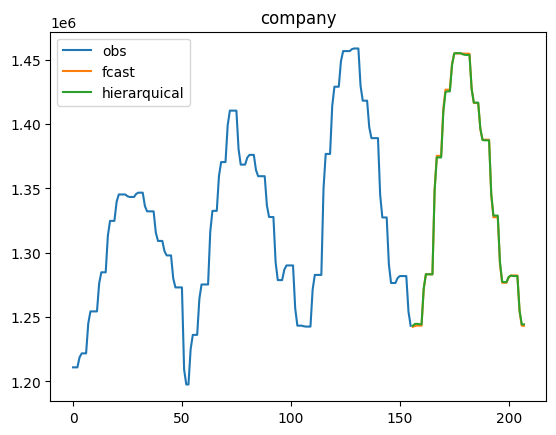

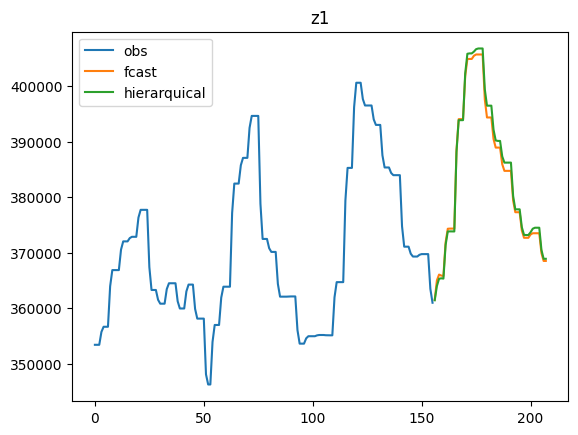

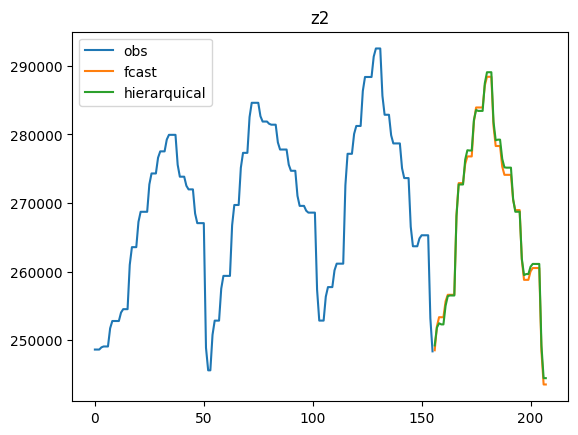

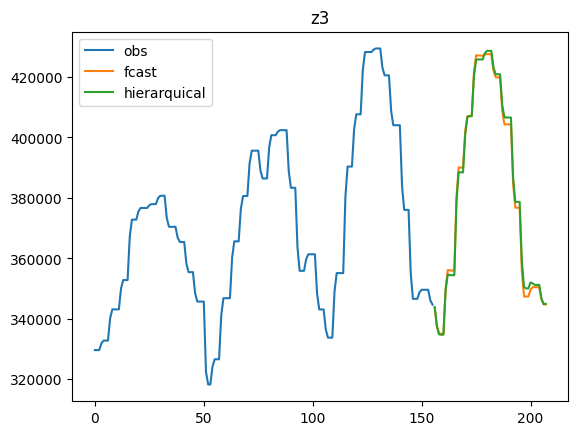

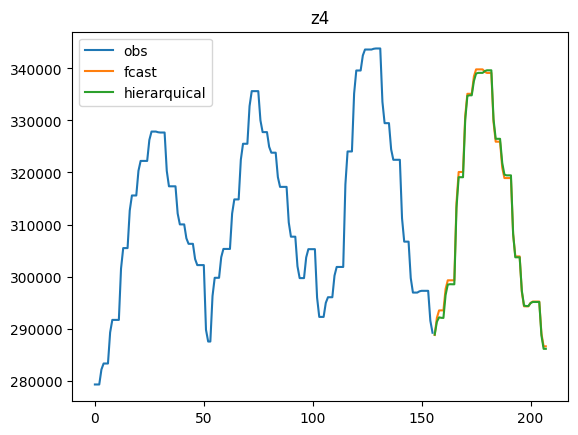

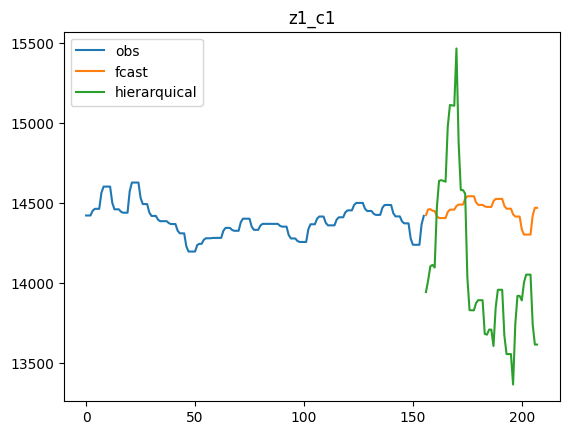

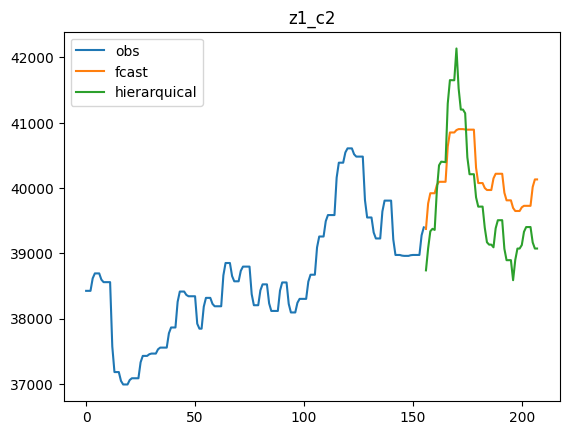

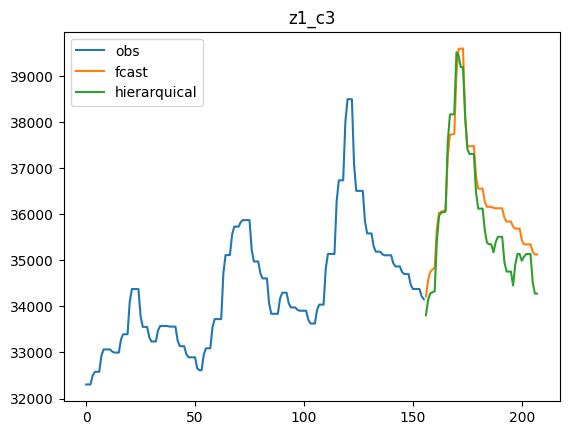

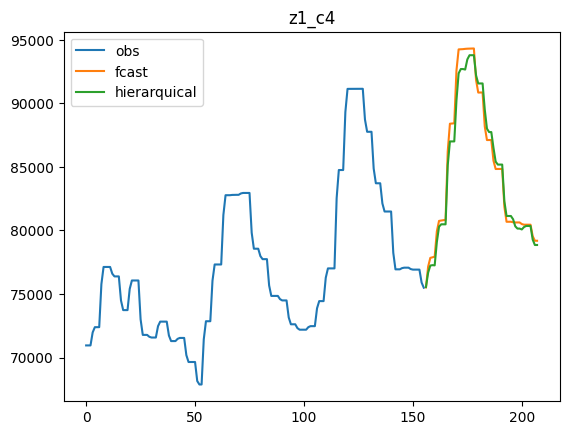

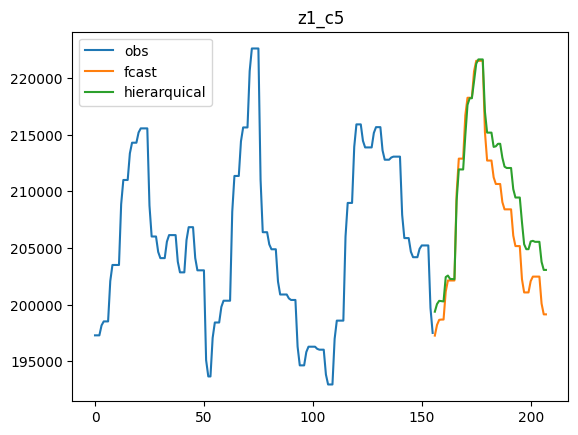

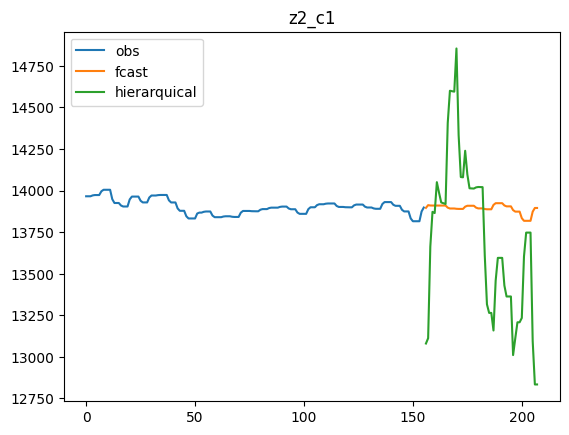

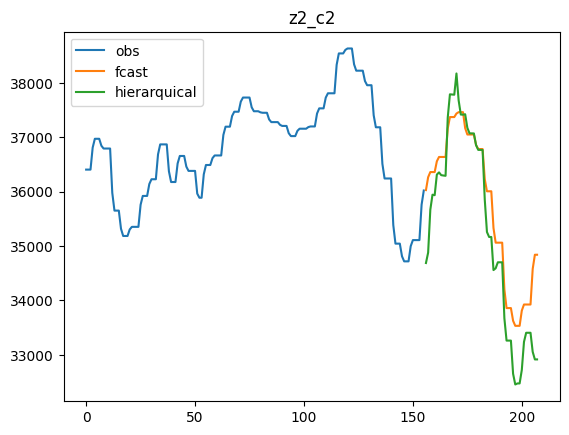

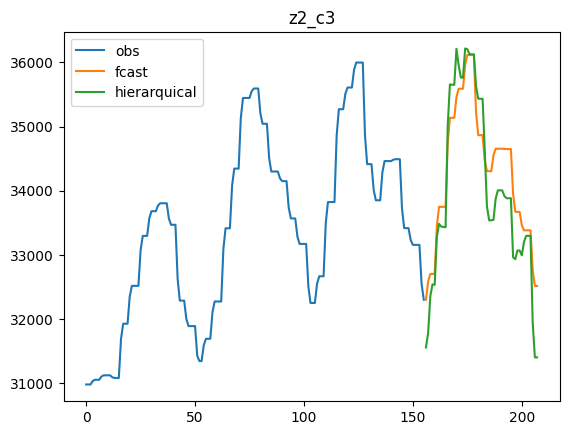

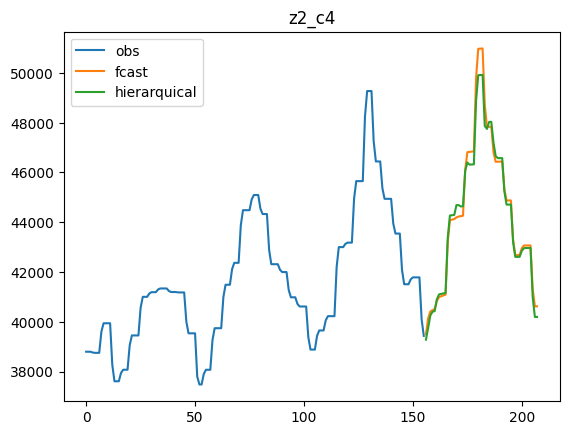

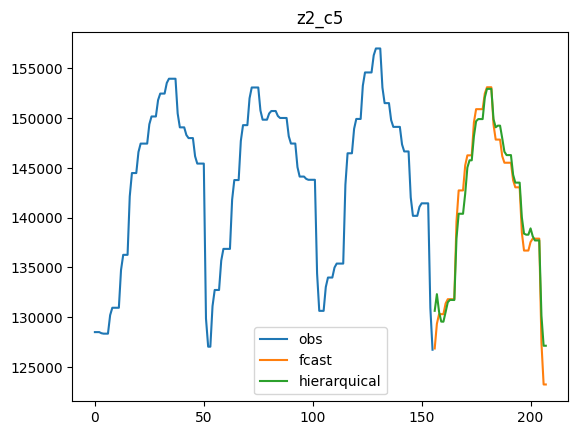

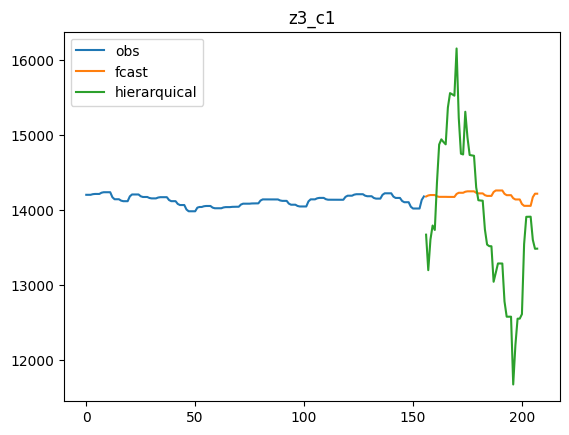

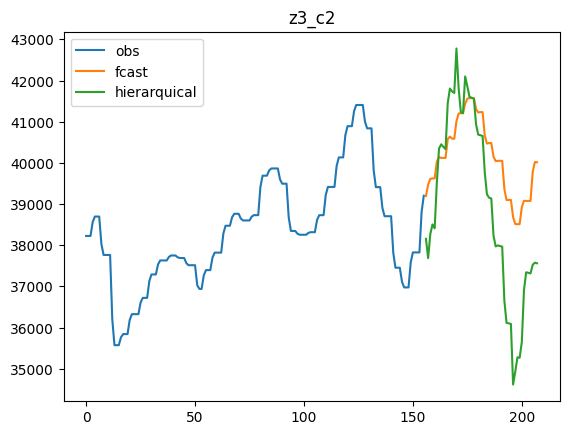

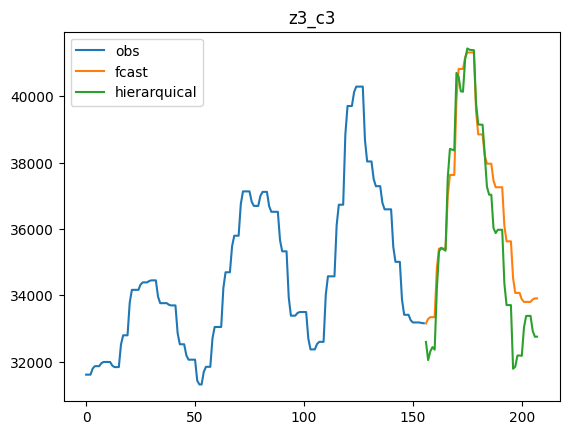

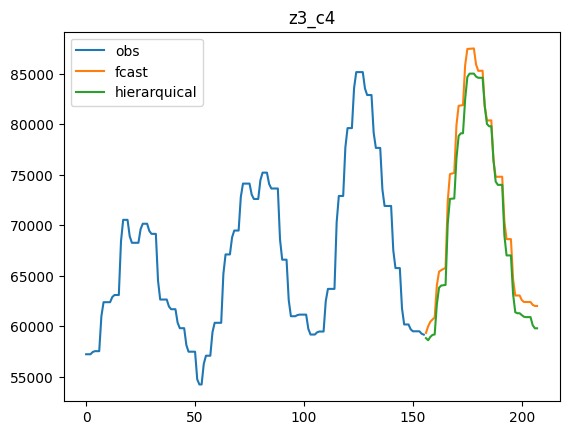

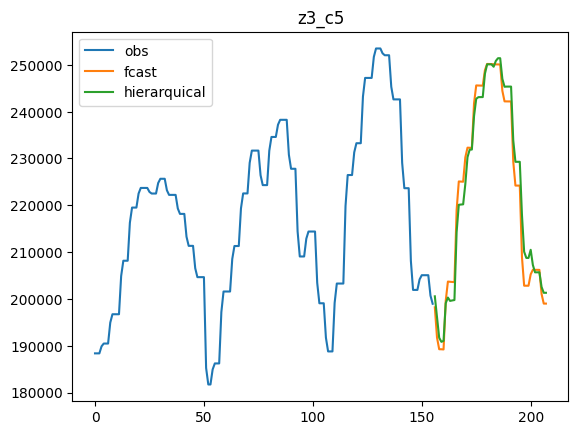

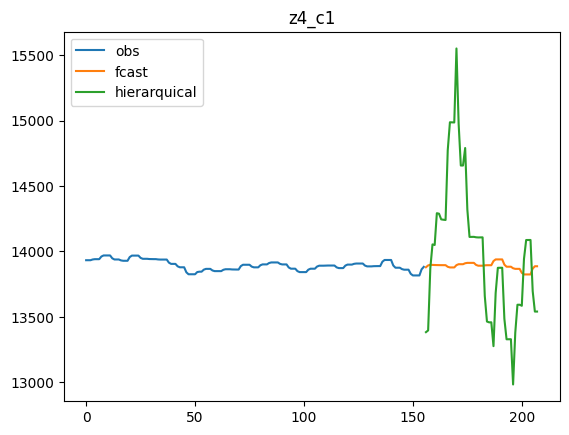

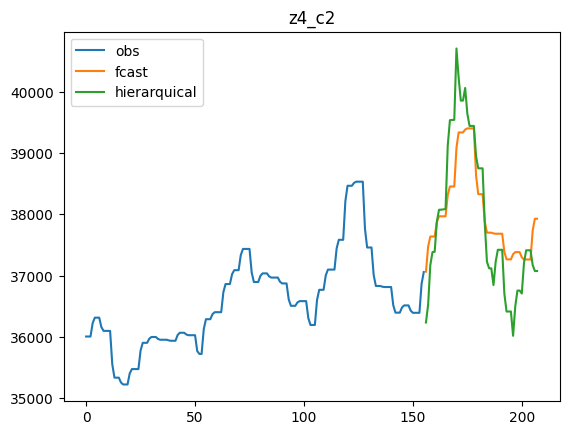

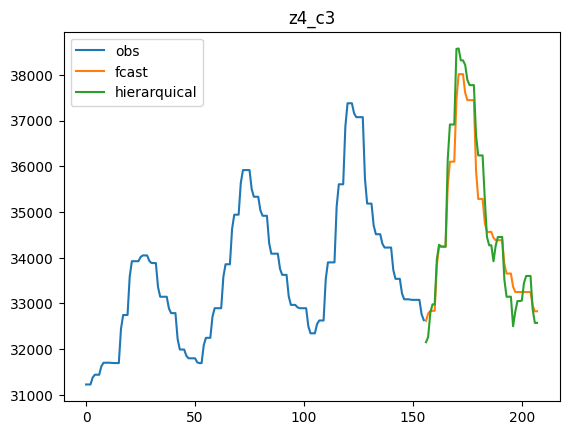

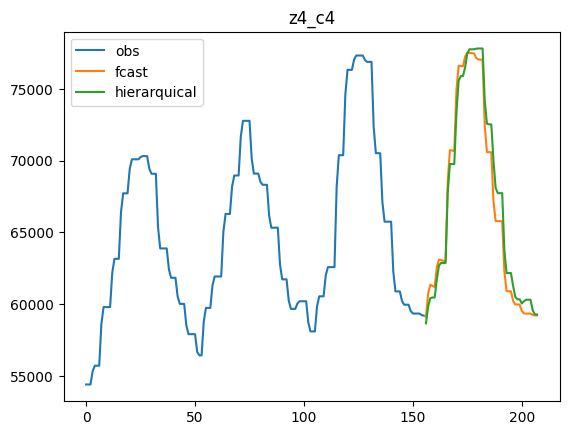

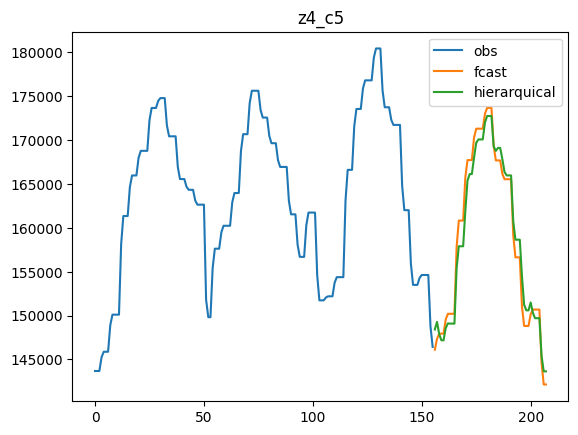

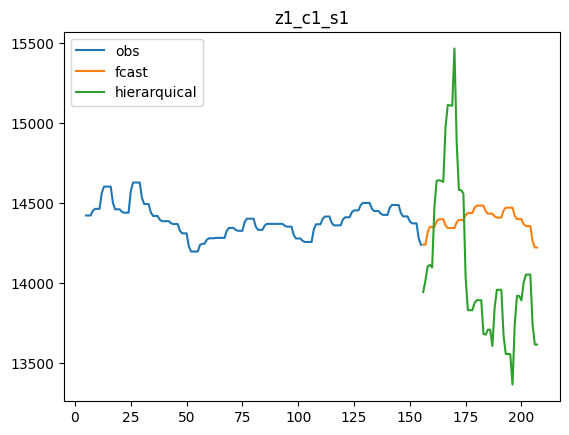

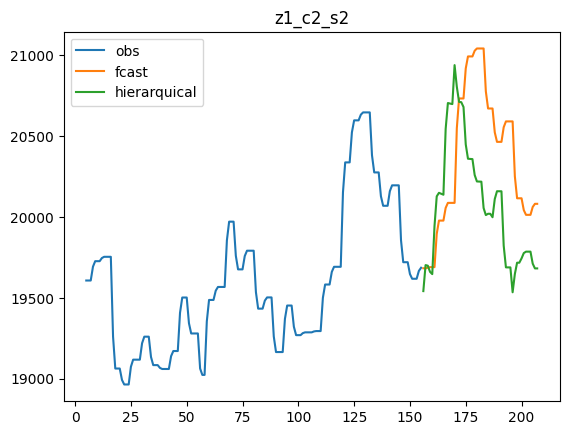

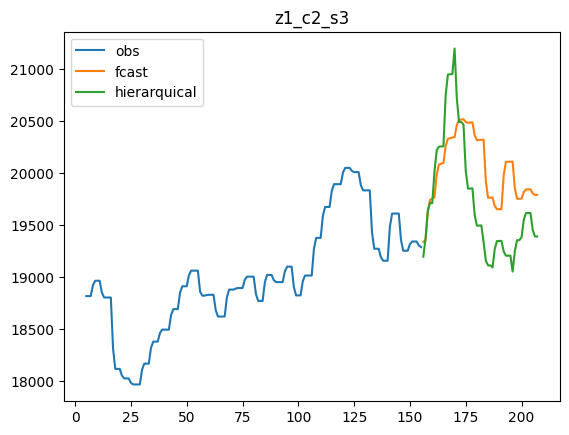

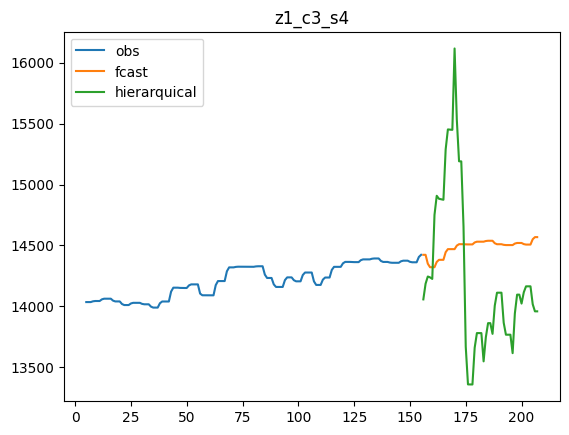

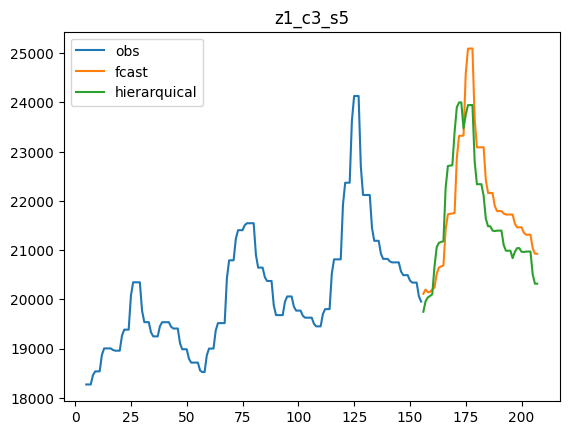

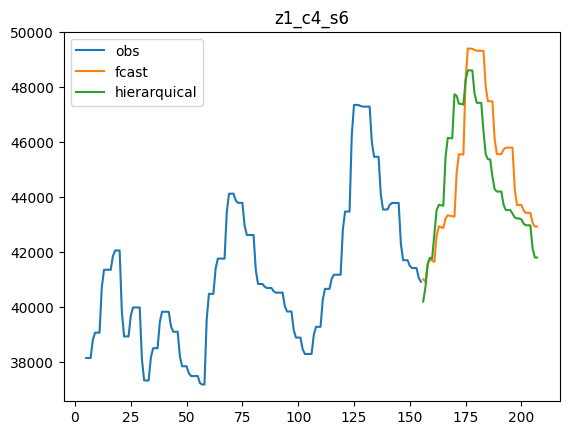

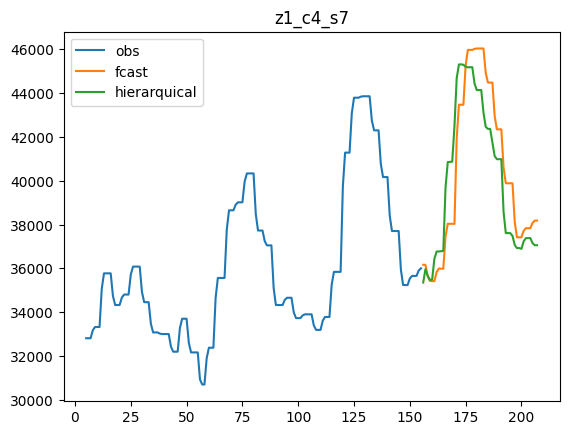

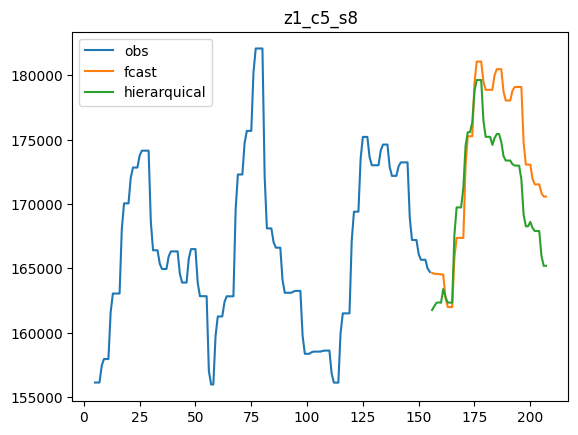

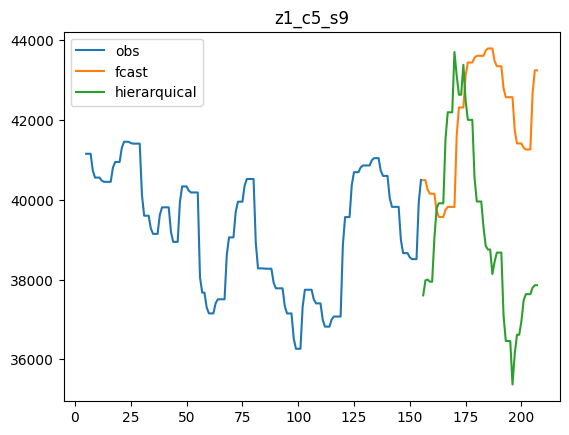

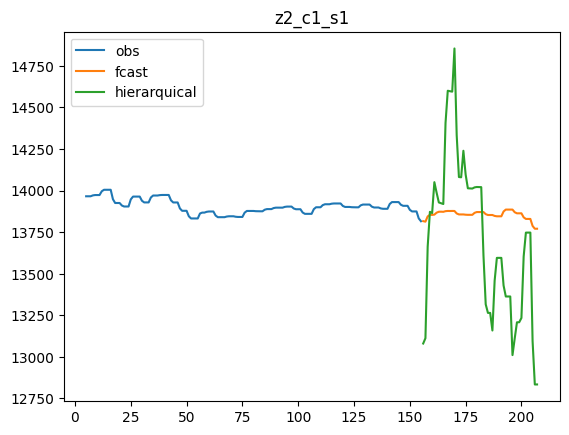

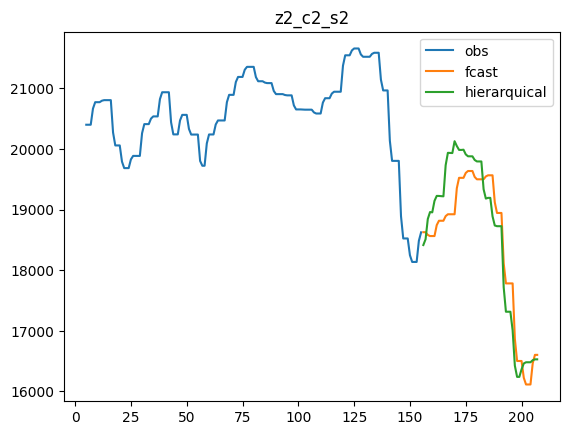

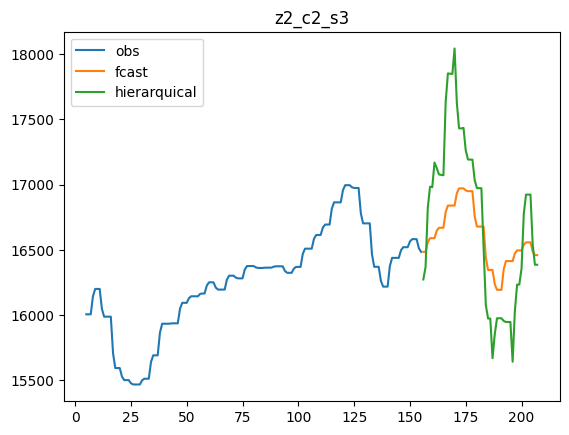

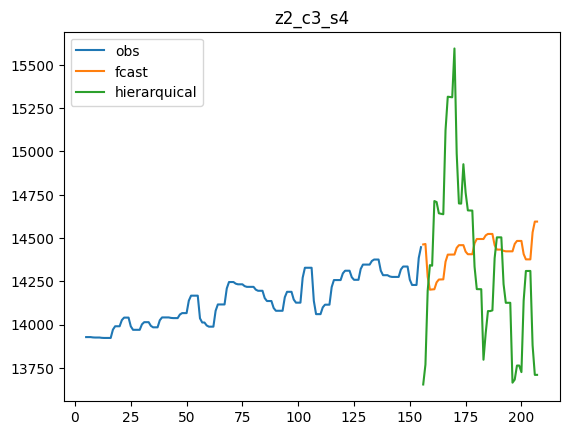

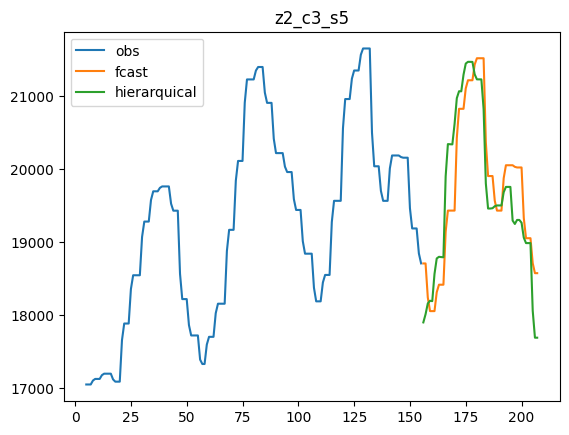

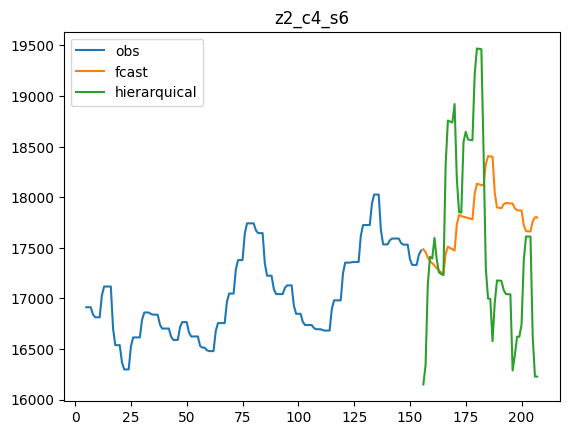

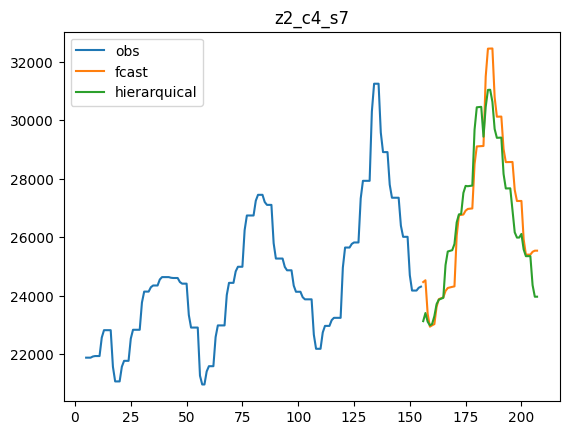

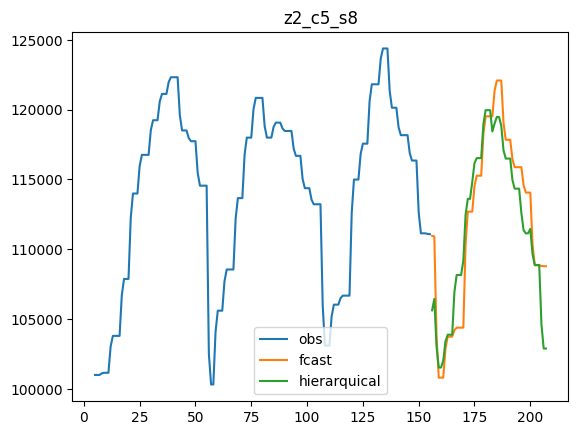

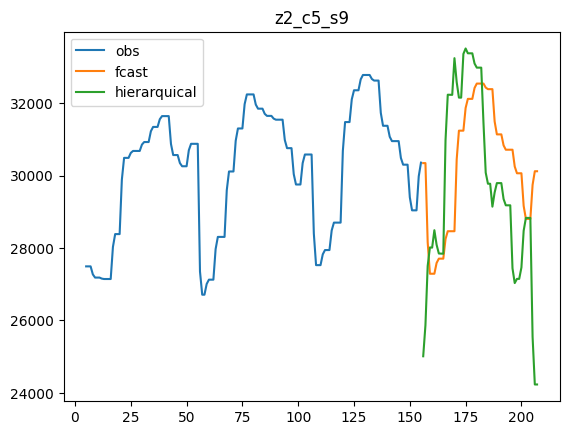

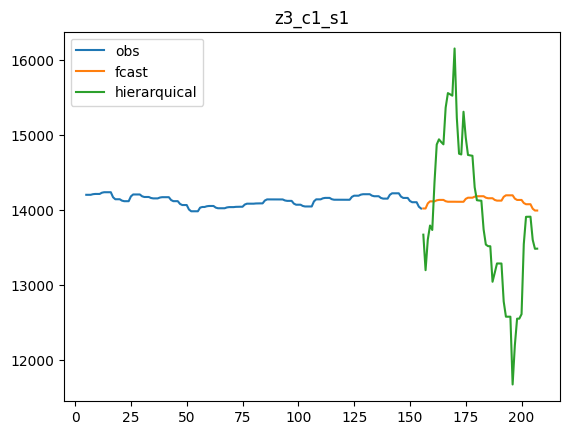

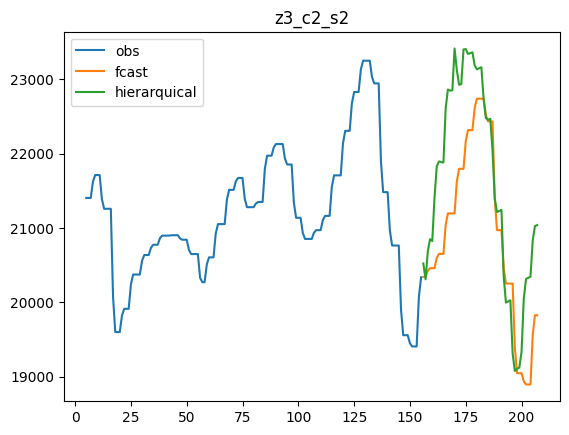

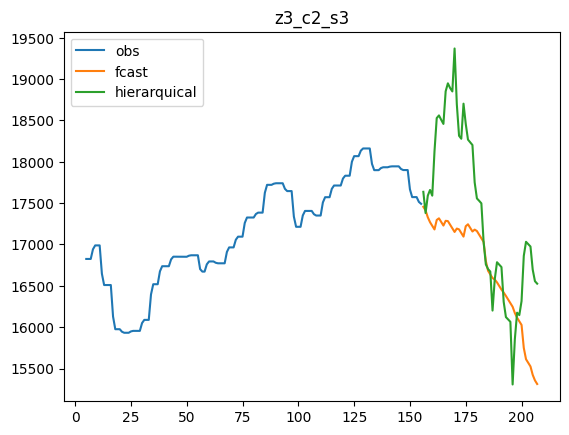

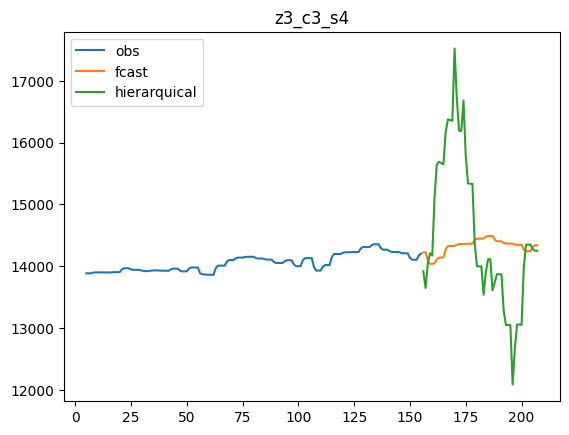

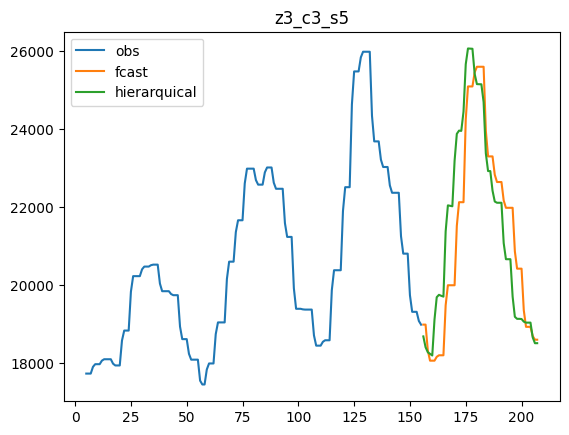

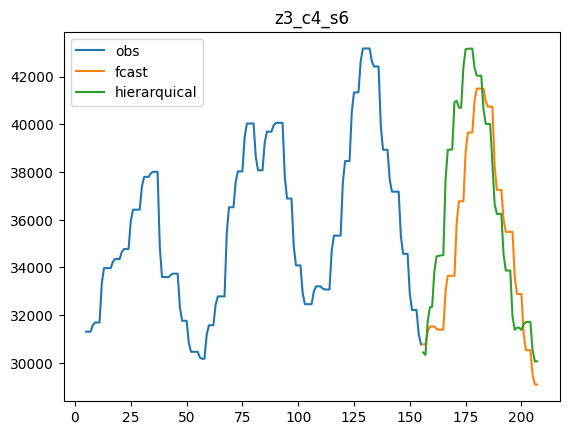

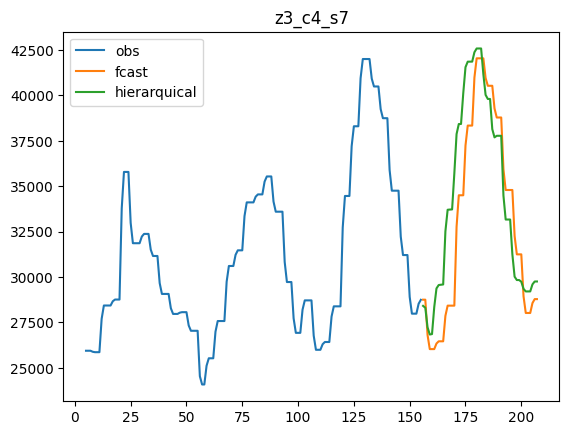

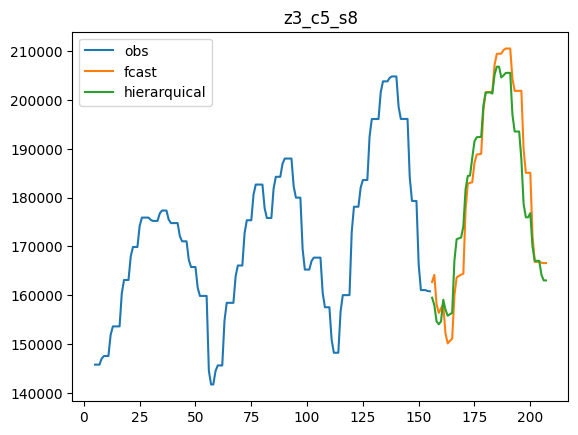

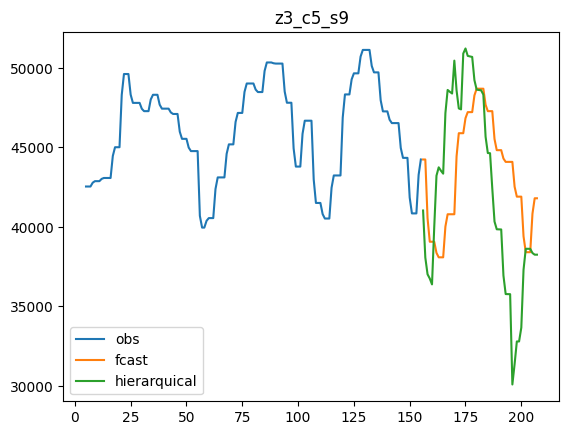

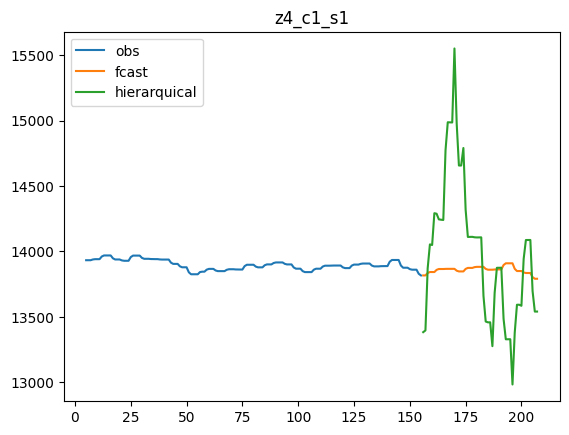

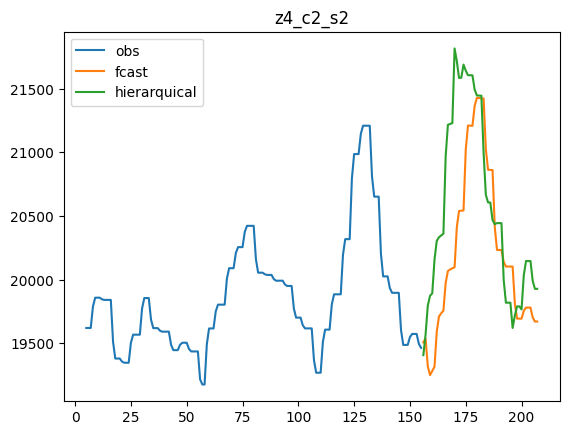

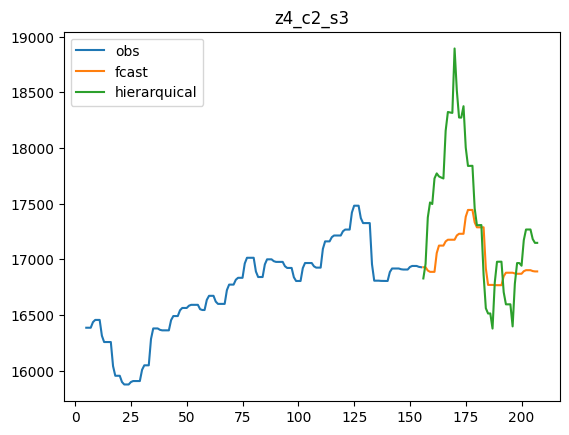

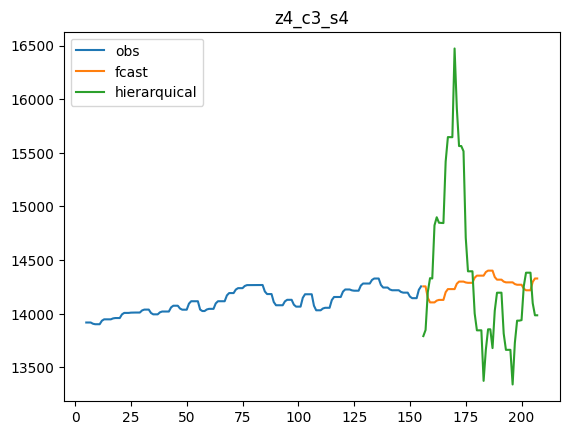

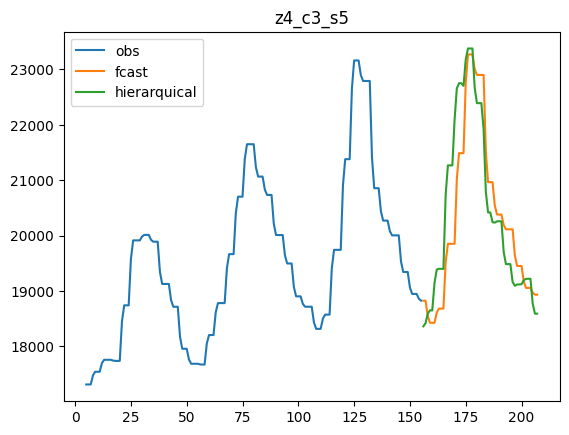

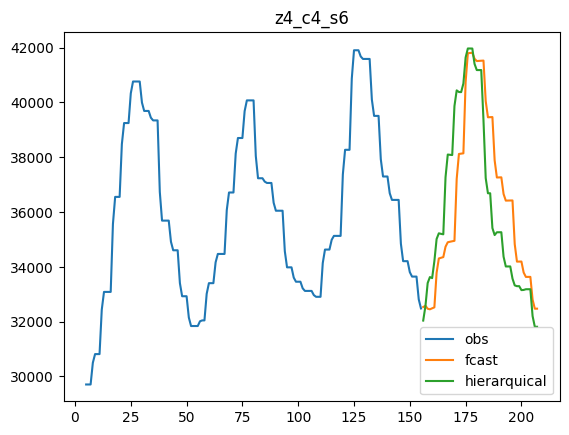

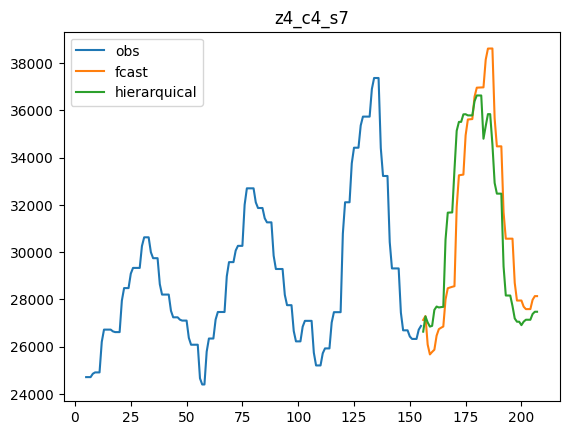

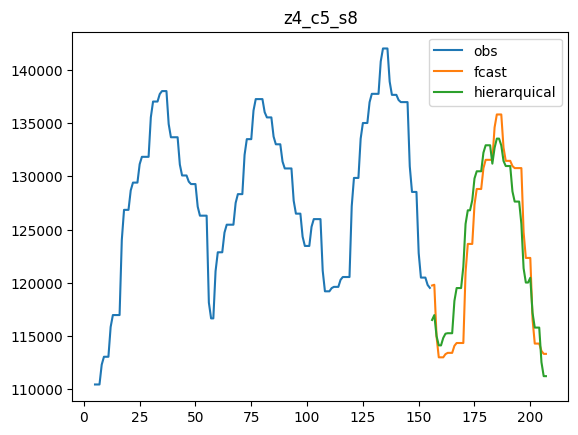

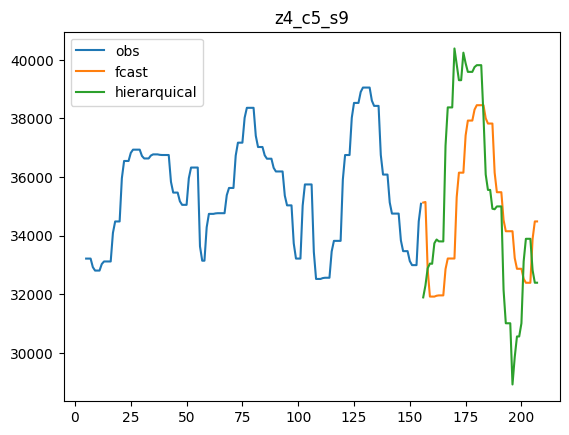

In [8]:
x1 = list(range(0 ,len(df_obs)))
x2 = list(range(len(df_obs), len(df_obs) + len(df_fcast) ))

for name in list(df_fcast.columns):
  plt.figure()
  plt.plot(x1, df_obs.loc[:, name], label ='obs')
  plt.plot(x2, df_fcast.loc[:, name], label ='fcast')
  plt.plot(x2, df_jerarquico.loc[:, name], label ='hierarquical')
  plt.title(name)
  plt.legend()